In [0]:
#Kubra Iqbal
#Final Project
#Csc 578

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from sklearn.preprocessing import Imputer

%matplotlib inline

In [0]:
#import the data
climatedata=pd.read_csv('climate_hour.csv', header=0, index_col=0)

In [0]:
#trying to understand the data
len(climatedata)

70037

In [0]:
climatedata.describe()

p (mbar)      T (degC)  ...  max. wv (m/s)      wd (deg)
count  70037.000000  70037.000000  ...   70037.000000  70037.000000
mean     989.214407      9.441694  ...       2.961253    174.943301
std        8.360583      8.420257  ...      75.626524     86.619521
min      918.500000    -22.760000  ...   -9999.000000      0.000000
25%      984.200000      3.350000  ...       1.760000    125.500000
50%      989.580000      9.410000  ...       2.960000    198.400000
75%      994.730000     15.460000  ...       4.730000    234.300000
max     1015.290000     37.280000  ...      20.330000    360.000000

[8 rows x 14 columns]

In [0]:
climatedata.head()

p (mbar)  T (degC)  ...  max. wv (m/s)  wd (deg)
Date Time                                ...                         
01.01.2009 01:00:00    996.50     -8.05  ...           0.63     192.7
01.01.2009 02:00:00    996.62     -8.88  ...           0.63     190.3
01.01.2009 03:00:00    996.84     -8.81  ...           0.63     167.2
01.01.2009 04:00:00    996.99     -9.05  ...           0.38     240.0
01.01.2009 05:00:00    997.46     -9.63  ...           0.88     157.0

[5 rows x 14 columns]

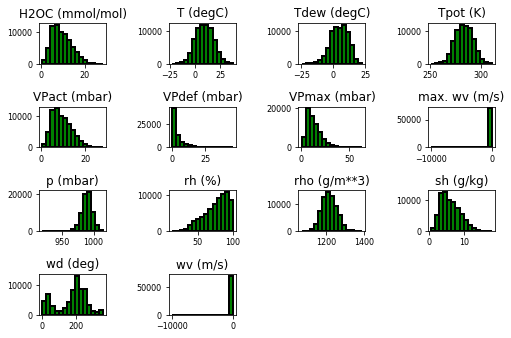

In [0]:
climatedata.hist(bins=15, color='green', edgecolor='black', linewidth=2.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

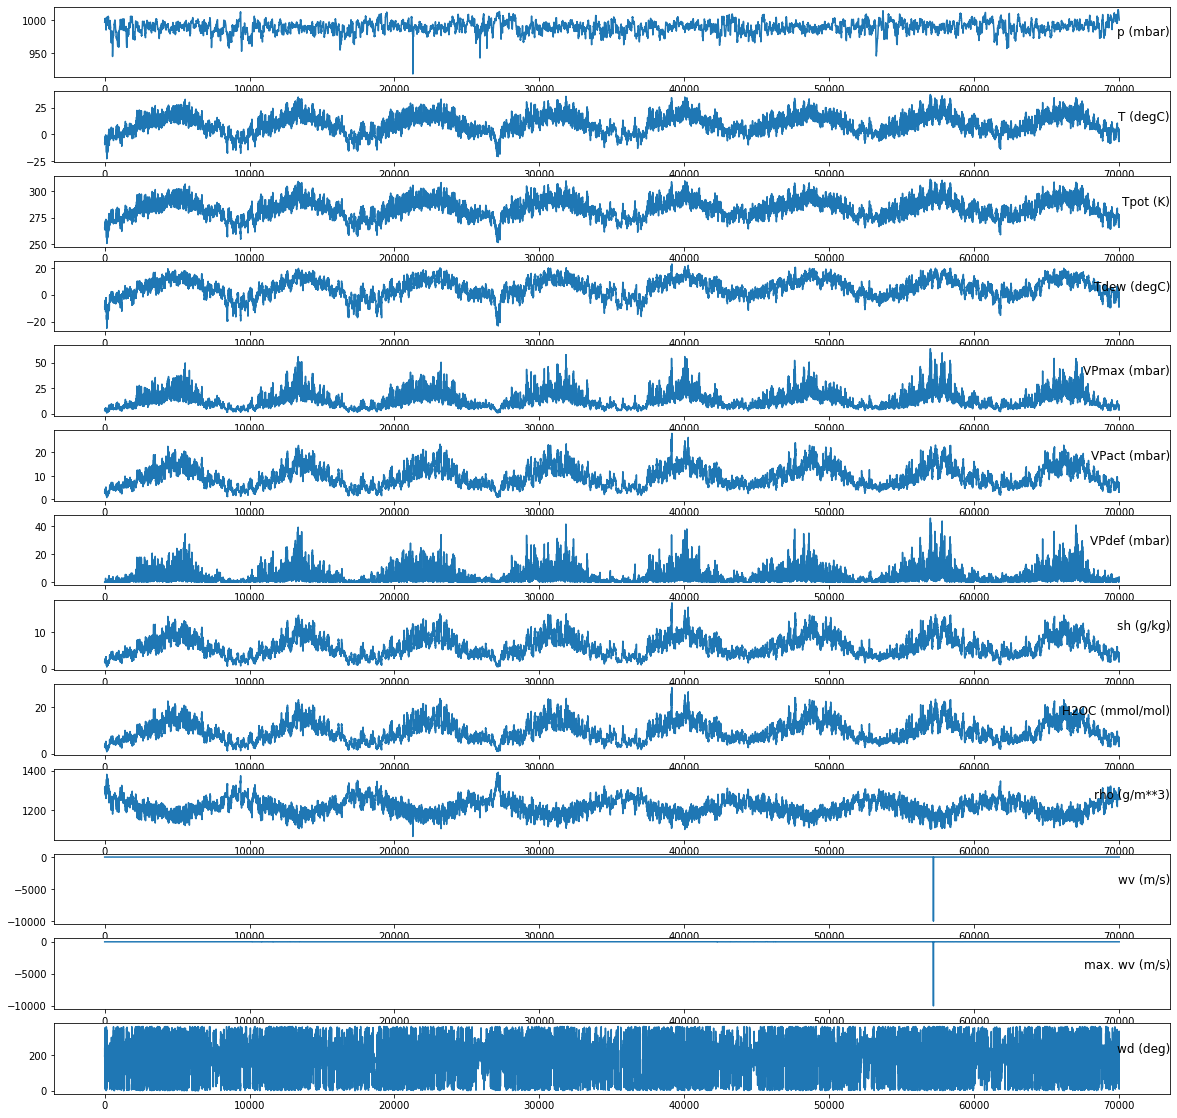

In [0]:
values = climatedata.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13]
i = 1
# plot each column
plt.figure(figsize=(20,20))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(climatedata.columns[group], y=.5, loc='right')
    i += 1
plt.show()

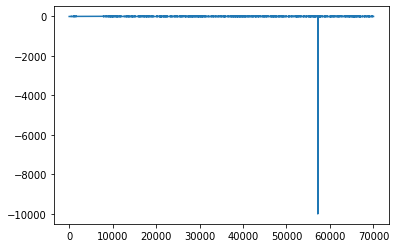

In [0]:
plt.plot(values[:, groups[10]])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


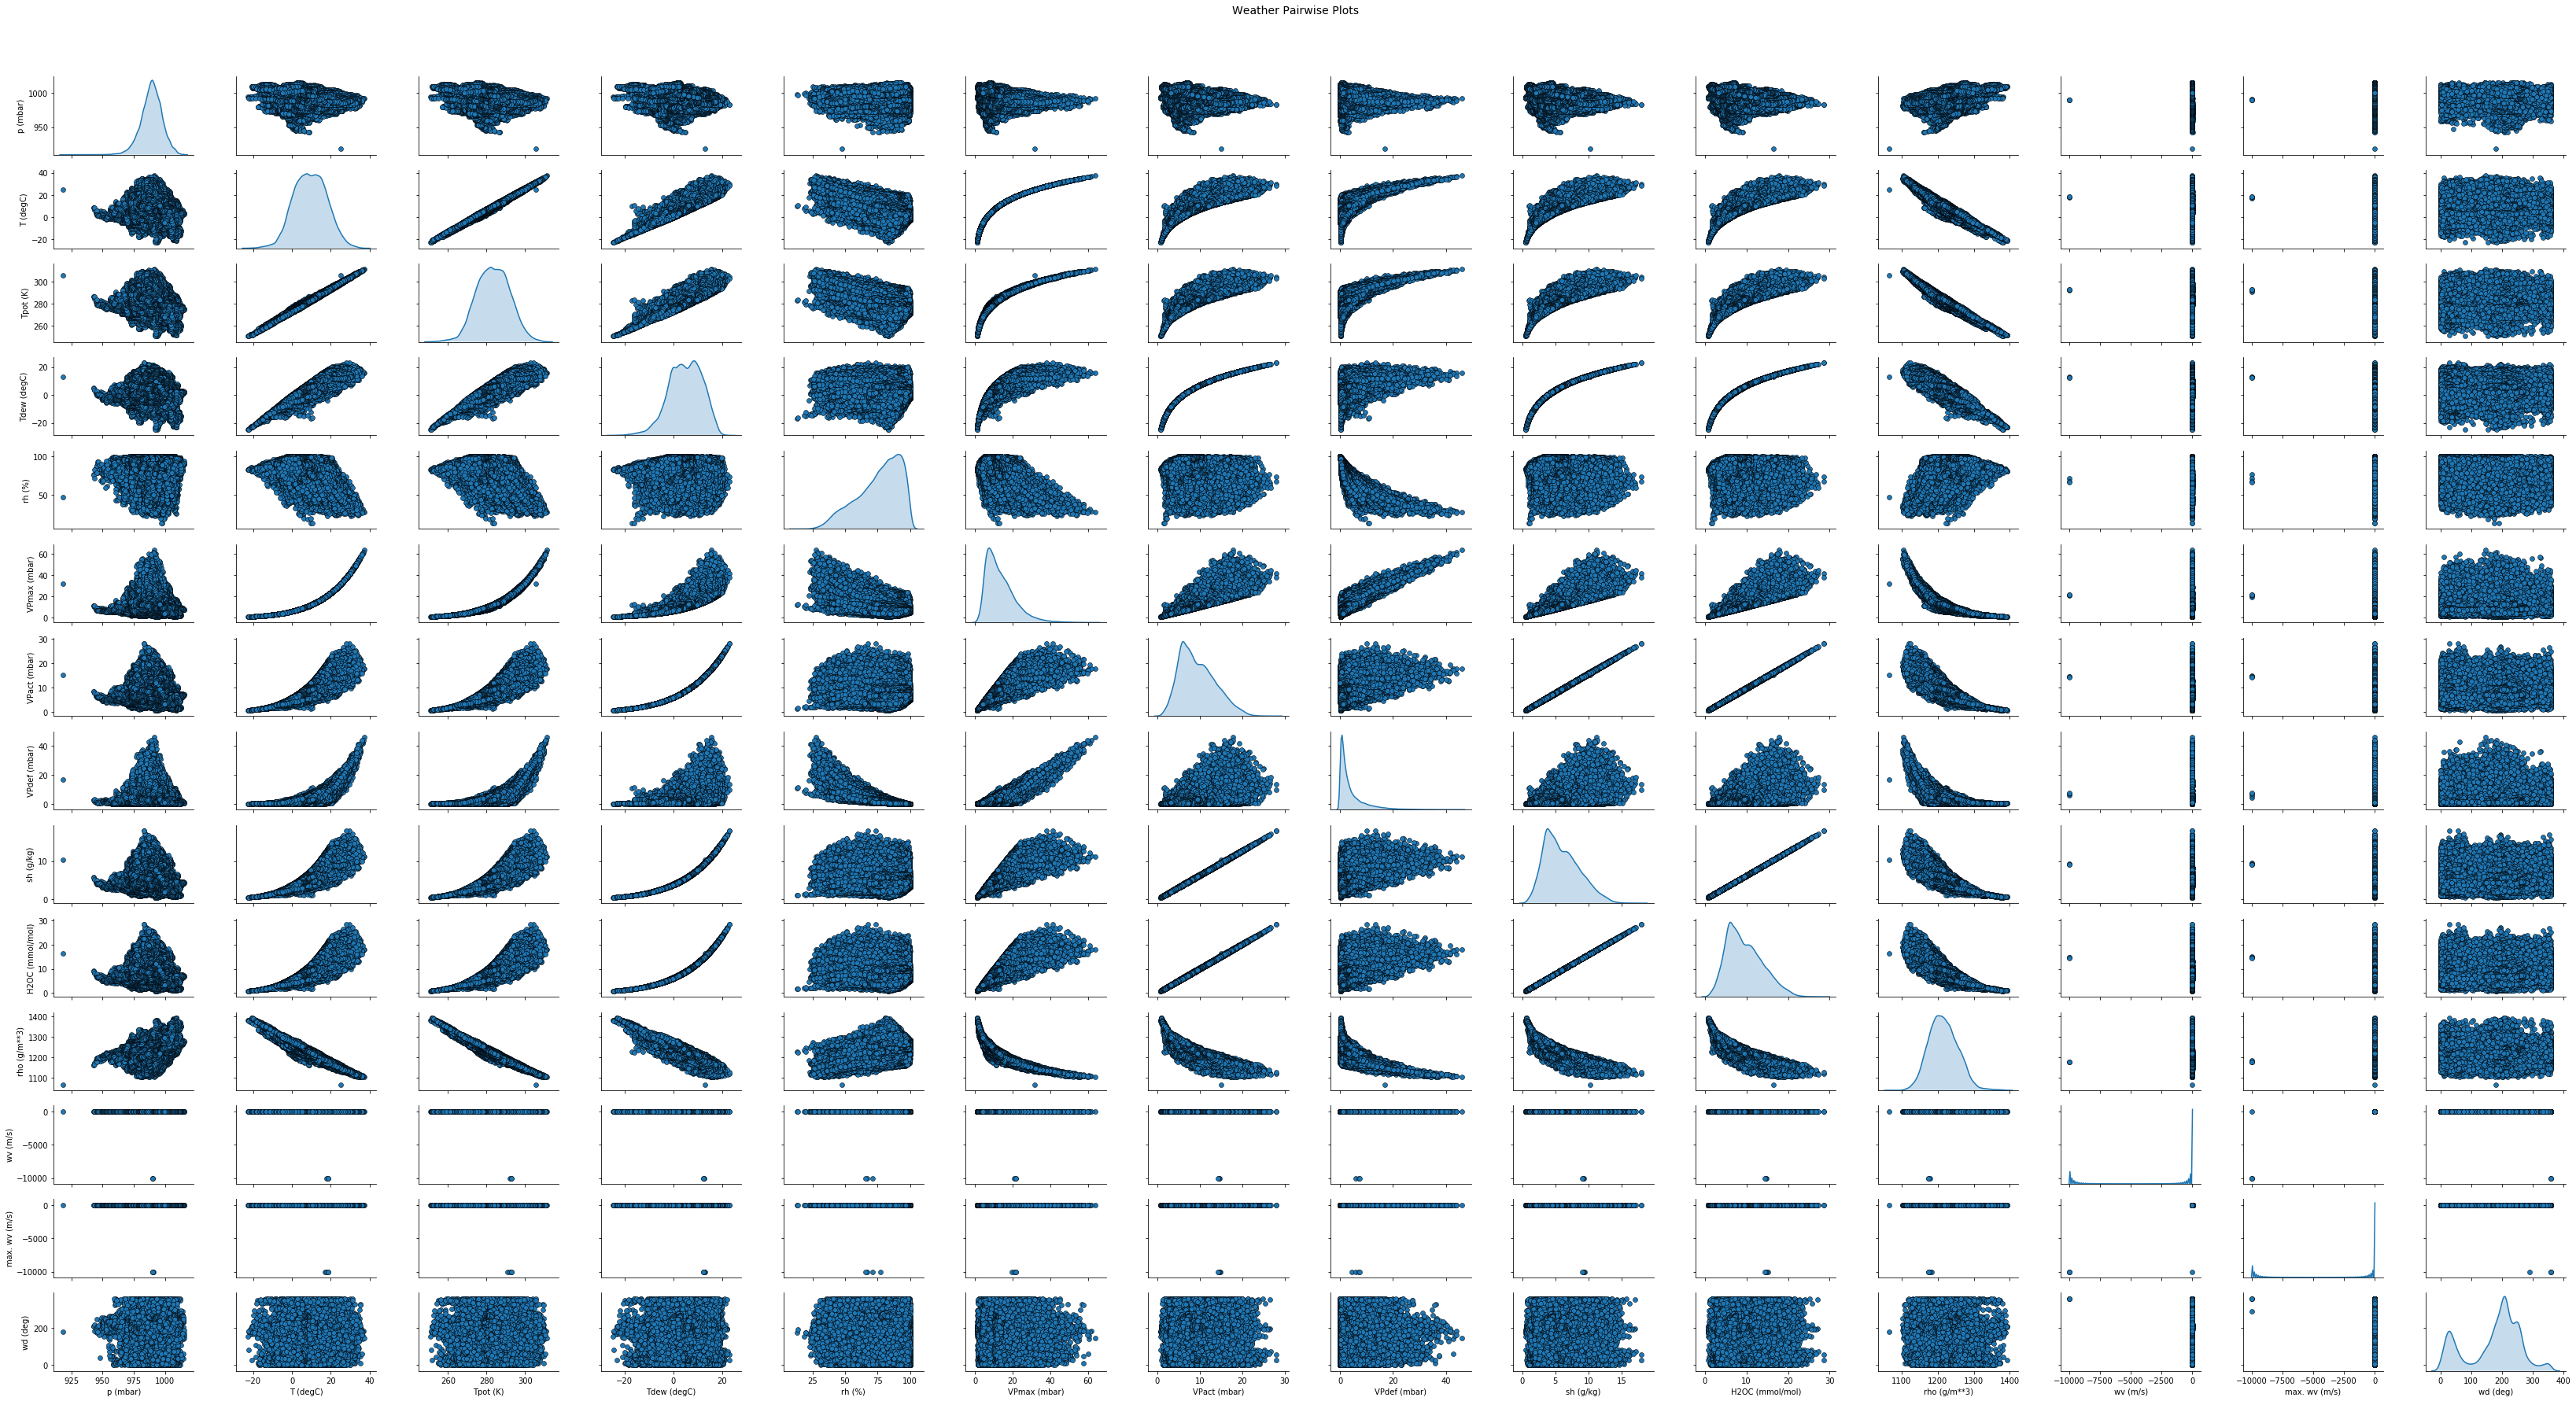

In [0]:
pp = sns.pairplot(climatedata, size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Weather Pairwise Plots', fontsize=14)
plt.show()

In [0]:
## to begin with, we are using four columns
for columns in climatedata.columns:
  print(columns)

p (mbar)
T (degC)
Tpot (K)
Tdew (degC)
rh (%)
VPmax (mbar)
VPact (mbar)
VPdef (mbar)
sh (g/kg)
H2OC (mmol/mol)
rho (g/m**3)
wv (m/s)
max. wv (m/s)
wd (deg)


In [0]:
#dropping some of the coloumns and keeping 4 coloumns 
climatedata = climatedata.drop(['Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)',
                                  'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'max. wv (m/s)', 'wd (deg)'], 1)


In [0]:
climatedata.head() #climate data

p (mbar)  T (degC)  rho (g/m**3)  wv (m/s)
Date Time                                                      
01.01.2009 01:00:00    996.50     -8.05       1307.86      0.21
01.01.2009 02:00:00    996.62     -8.88       1312.25      0.25
01.01.2009 03:00:00    996.84     -8.81       1312.18      0.18
01.01.2009 04:00:00    996.99     -9.05       1313.61      0.10
01.01.2009 05:00:00    997.46     -9.63       1317.19      0.40

In [0]:
climatedata.shape #shape

(70037, 4)

In [0]:
climatedata.columns #checking colums

Index(['p (mbar)', 'T (degC)', 'rho (g/m**3)', 'wv (m/s)'], dtype='object')

In [0]:
x_data = climatedata[['p (mbar)', 'T (degC)', 'rho (g/m**3)', 'wv (m/s)']]

In [0]:
x_data #looking at data

p (mbar)  T (degC)  rho (g/m**3)  wv (m/s)
Date Time                                                      
01.01.2009 01:00:00    996.50     -8.05       1307.86      0.21
01.01.2009 02:00:00    996.62     -8.88       1312.25      0.25
01.01.2009 03:00:00    996.84     -8.81       1312.18      0.18
01.01.2009 04:00:00    996.99     -9.05       1313.61      0.10
01.01.2009 05:00:00    997.46     -9.63       1317.19      0.40
...                       ...       ...           ...       ...
31.12.2016 20:00:00   1001.47     -1.52       1282.60      1.24
31.12.2016 21:00:00   1001.29     -3.09       1289.78      0.61
31.12.2016 22:00:00   1000.70     -2.59       1286.67      0.38
31.12.2016 23:00:00   1000.21     -3.76       1291.71      0.89
01.01.2017 00:00:00    999.82     -4.82       1296.38      1.23

[70037 rows x 4 columns]

In [0]:
x_data.shape

(70037, 4)

In [0]:
y_data = climatedata[['T (degC)']]

In [0]:
y_data

T (degC)
Date Time                    
01.01.2009 01:00:00     -8.05
01.01.2009 02:00:00     -8.88
01.01.2009 03:00:00     -8.81
01.01.2009 04:00:00     -9.05
01.01.2009 05:00:00     -9.63
...                       ...
31.12.2016 20:00:00     -1.52
31.12.2016 21:00:00     -3.09
31.12.2016 22:00:00     -2.59
31.12.2016 23:00:00     -3.76
01.01.2017 00:00:00     -4.82

[70037 rows x 1 columns]

In [0]:
y_data.shape #y data shape

(70037, 1)

In [0]:
#deleting the last 53 rows from x_data
#dont do that anymore

#x_data = x_data.iloc[:53]
#x_data = x_data.iloc[:-53]

In [0]:
x_data #looking at x data

p (mbar)  T (degC)  rho (g/m**3)  wv (m/s)
Date Time                                                      
01.01.2009 01:00:00    996.50     -8.05       1307.86      0.21
01.01.2009 02:00:00    996.62     -8.88       1312.25      0.25
01.01.2009 03:00:00    996.84     -8.81       1312.18      0.18
01.01.2009 04:00:00    996.99     -9.05       1313.61      0.10
01.01.2009 05:00:00    997.46     -9.63       1317.19      0.40
...                       ...       ...           ...       ...
31.12.2016 20:00:00   1001.47     -1.52       1282.60      1.24
31.12.2016 21:00:00   1001.29     -3.09       1289.78      0.61
31.12.2016 22:00:00   1000.70     -2.59       1286.67      0.38
31.12.2016 23:00:00   1000.21     -3.76       1291.71      0.89
01.01.2017 00:00:00    999.82     -4.82       1296.38      1.23

[70037 rows x 4 columns]

In [0]:
x_data.shape #looking at shape

(70037, 4)

In [0]:
print(x_data.shape, y_data.shape)

(70037, 4) (70037, 1)


In [0]:
#deleting the first 54 rows
#we want the data 6 hours in the future


y_data = y_data.iloc[53:]

In [0]:
y_data #looking at y_data

T (degC)
Date Time                    
03.01.2009 06:00:00     -8.20
03.01.2009 07:00:00     -8.48
03.01.2009 08:00:00     -9.28
03.01.2009 09:00:00     -9.46
03.01.2009 10:00:00     -8.53
...                       ...
31.12.2016 20:00:00     -1.52
31.12.2016 21:00:00     -3.09
31.12.2016 22:00:00     -2.59
31.12.2016 23:00:00     -3.76
01.01.2017 00:00:00     -4.82

[69984 rows x 1 columns]

In [0]:
print(x_data.shape, y_data.shape)

(70037, 4) (69984, 1)


In [0]:
# At this stage we restructure the model 

x_data_values = x_data.values
x_data_values

array([[ 9.96500e+02, -8.05000e+00,  1.30786e+03,  2.10000e-01],
       [ 9.96620e+02, -8.88000e+00,  1.31225e+03,  2.50000e-01],
       [ 9.96840e+02, -8.81000e+00,  1.31218e+03,  1.80000e-01],
       ...,
       [ 1.00070e+03, -2.59000e+00,  1.28667e+03,  3.80000e-01],
       [ 1.00021e+03, -3.76000e+00,  1.29171e+03,  8.90000e-01],
       [ 9.99820e+02, -4.82000e+00,  1.29638e+03,  1.23000e+00]])

In [0]:
x_data_values #x data values

array([[ 9.96500e+02, -8.05000e+00,  1.30786e+03,  2.10000e-01],
       [ 9.96620e+02, -8.88000e+00,  1.31225e+03,  2.50000e-01],
       [ 9.96840e+02, -8.81000e+00,  1.31218e+03,  1.80000e-01],
       ...,
       [ 1.00070e+03, -2.59000e+00,  1.28667e+03,  3.80000e-01],
       [ 1.00021e+03, -3.76000e+00,  1.29171e+03,  8.90000e-01],
       [ 9.99820e+02, -4.82000e+00,  1.29638e+03,  1.23000e+00]])

In [0]:
#program to restructure the data- 
# function to help with reformatting the data set
#we are doing this to reformatting of dataset into time series format 

def restructure(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    # setting up the input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # setting up the forecasting sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    # concatenate all the columns
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [0]:
#number of hours and features 
#added to that file
n_hours = 47
n_features = 4

In [0]:
# reframing the x_data
x_data_reframed = restructure(x_data, n_hours, 1)
x_data_reframed.shape

(69990, 192)

In [0]:
#deleting the last 6 rows from the data
x_data_reframed_del = x_data_reframed[:-6]
x_data_reframed_del.shape
#68964, 192

(69984, 192)

In [0]:
x_data_reframed

var1(t-47)  var2(t-47)  ...  var3(t)  var4(t)
Date Time                                    ...                  
03.01.2009 00:00:00      996.50       -8.05  ...  1298.79     1.42
03.01.2009 01:00:00      996.62       -8.88  ...  1301.68     0.27
03.01.2009 02:00:00      996.84       -8.81  ...  1306.26     0.39
03.01.2009 03:00:00      996.99       -9.05  ...  1305.61     0.43
03.01.2009 04:00:00      997.46       -9.63  ...  1305.89     0.77
...                         ...         ...  ...      ...      ...
31.12.2016 20:00:00     1012.46       -0.12  ...  1282.60     1.24
31.12.2016 21:00:00     1012.34       -0.84  ...  1289.78     0.61
31.12.2016 22:00:00     1012.41       -1.15  ...  1286.67     0.38
31.12.2016 23:00:00     1012.35       -1.84  ...  1291.71     0.89
01.01.2017 00:00:00     1012.38       -2.25  ...  1296.38     1.23

[69990 rows x 192 columns]

In [0]:
#Splitting the data into train and test 
x_training = x_data_reframed_del[:48000]
x_test = x_data_reframed_del[48000:]

In [0]:
x_training

var1(t-47)  var2(t-47)  ...  var3(t)  var4(t)
Date Time                                    ...                  
03.01.2009 00:00:00      996.50       -8.05  ...  1298.79     1.42
03.01.2009 01:00:00      996.62       -8.88  ...  1301.68     0.27
03.01.2009 02:00:00      996.84       -8.81  ...  1306.26     0.39
03.01.2009 03:00:00      996.99       -9.05  ...  1305.61     0.43
03.01.2009 04:00:00      997.46       -9.63  ...  1305.89     0.77
...                         ...         ...  ...      ...      ...
25.06.2014 21:00:00      992.61       14.87  ...  1206.66     0.98
25.06.2014 22:00:00      992.55       15.09  ...  1210.28     1.56
25.06.2014 23:00:00      992.53       13.05  ...  1208.46     1.48
26.06.2014 00:00:00      992.19       12.21  ...  1207.14     1.02
26.06.2014 01:00:00      992.09       11.44  ...  1208.81     0.73

[48000 rows x 192 columns]

In [0]:
x_test

var1(t-47)  var2(t-47)  ...  var3(t)  var4(t)
Date Time                                    ...                  
26.06.2014 02:00:00      991.84       11.29  ...  1208.75     0.40
26.06.2014 03:00:00      991.73        9.11  ...  1212.21     0.71
26.06.2014 04:00:00      991.96        9.52  ...  1213.97     0.94
26.06.2014 05:00:00      991.91       11.57  ...  1214.50     0.51
26.06.2014 06:00:00      991.79       13.53  ...  1213.17     0.92
...                         ...         ...  ...      ...      ...
31.12.2016 14:00:00     1013.75        4.29  ...  1258.88     0.36
31.12.2016 15:00:00     1013.48        4.55  ...  1253.58     0.30
31.12.2016 16:00:00     1012.92        3.88  ...  1263.23     0.31
31.12.2016 17:00:00     1012.66        3.57  ...  1269.80     1.45
31.12.2016 18:00:00     1012.56        2.86  ...  1276.52     0.39

[21984 rows x 192 columns]

In [0]:
x_test.shape

(21984, 192)

In [0]:
# Splitting training data into train and validation (x)
x_train = x_training.iloc[:38400]
x_validation = x_training.iloc[38400:]

In [0]:
x_train

var1(t-47)  var2(t-47)  ...  var3(t)  var4(t)
Date Time                                    ...                  
03.01.2009 00:00:00      996.50       -8.05  ...  1298.79     1.42
03.01.2009 01:00:00      996.62       -8.88  ...  1301.68     0.27
03.01.2009 02:00:00      996.84       -8.81  ...  1306.26     0.39
03.01.2009 03:00:00      996.99       -9.05  ...  1305.61     0.43
03.01.2009 04:00:00      997.46       -9.63  ...  1305.89     0.77
...                         ...         ...  ...      ...      ...
21.05.2013 21:00:00      980.02       12.46  ...  1193.82     1.21
21.05.2013 22:00:00      979.93       11.79  ...  1194.50     0.31
21.05.2013 23:00:00      980.34       11.16  ...  1196.59     0.59
22.05.2013 00:00:00      980.39       10.67  ...  1198.78     1.03
22.05.2013 01:00:00      981.03       10.59  ...  1198.76     1.66

[38400 rows x 192 columns]

In [0]:
type(x_train) #need to check what type

pandas.core.frame.DataFrame

In [0]:
x_validation

var1(t-47)  var2(t-47)  ...  var3(t)  var4(t)
Date Time                                    ...                  
22.05.2013 02:00:00      981.14       10.46  ...  1200.01     0.37
22.05.2013 03:00:00      981.26       10.01  ...  1196.75     1.50
22.05.2013 04:00:00      981.53        9.79  ...  1197.93     1.22
22.05.2013 05:00:00      981.91       10.18  ...  1196.68     1.08
22.05.2013 06:00:00      981.98       10.89  ...  1197.69     0.88
...                         ...         ...  ...      ...      ...
25.06.2014 21:00:00      992.61       14.87  ...  1206.66     0.98
25.06.2014 22:00:00      992.55       15.09  ...  1210.28     1.56
25.06.2014 23:00:00      992.53       13.05  ...  1208.46     1.48
26.06.2014 00:00:00      992.19       12.21  ...  1207.14     1.02
26.06.2014 01:00:00      992.09       11.44  ...  1208.81     0.73

[9600 rows x 192 columns]

In [0]:
#dividing y data into training and test sets 
y_training = y_data.iloc[:48000]
y_test = y_data.iloc[48000:]

In [0]:
y_training

T (degC)
Date Time                    
03.01.2009 06:00:00     -8.20
03.01.2009 07:00:00     -8.48
03.01.2009 08:00:00     -9.28
03.01.2009 09:00:00     -9.46
03.01.2009 10:00:00     -8.53
...                       ...
26.06.2014 03:00:00     10.02
26.06.2014 04:00:00      9.68
26.06.2014 05:00:00      9.58
26.06.2014 06:00:00     10.01
26.06.2014 07:00:00     11.61

[48000 rows x 1 columns]

In [0]:
y_training 

T (degC)
Date Time                    
03.01.2009 06:00:00     -8.20
03.01.2009 07:00:00     -8.48
03.01.2009 08:00:00     -9.28
03.01.2009 09:00:00     -9.46
03.01.2009 10:00:00     -8.53
...                       ...
26.06.2014 03:00:00     10.02
26.06.2014 04:00:00      9.68
26.06.2014 05:00:00      9.58
26.06.2014 06:00:00     10.01
26.06.2014 07:00:00     11.61

[48000 rows x 1 columns]

In [0]:
type(y_training) #checking type

pandas.core.frame.DataFrame

In [0]:
y_test

T (degC)
Date Time                    
26.06.2014 08:00:00     12.65
26.06.2014 09:00:00     13.54
26.06.2014 10:00:00     15.41
26.06.2014 11:00:00     16.31
26.06.2014 12:00:00     16.93
...                       ...
31.12.2016 20:00:00     -1.52
31.12.2016 21:00:00     -3.09
31.12.2016 22:00:00     -2.59
31.12.2016 23:00:00     -3.76
01.01.2017 00:00:00     -4.82

[21984 rows x 1 columns]

In [0]:
# Dividing training data into train and validation (y)
y_train = y_training.iloc[:38400]
y_validation = y_training.iloc[38400:]

In [0]:
y_train

T (degC)
Date Time                    
03.01.2009 06:00:00     -8.20
03.01.2009 07:00:00     -8.48
03.01.2009 08:00:00     -9.28
03.01.2009 09:00:00     -9.46
03.01.2009 10:00:00     -8.53
...                       ...
22.05.2013 03:00:00     10.81
22.05.2013 04:00:00     10.39
22.05.2013 05:00:00     10.50
22.05.2013 06:00:00     10.12
22.05.2013 07:00:00     10.66

[38400 rows x 1 columns]

In [0]:
y_validation

T (degC)
Date Time                    
22.05.2013 08:00:00      9.36
22.05.2013 09:00:00      8.80
22.05.2013 10:00:00      8.46
22.05.2013 11:00:00      8.63
22.05.2013 12:00:00      8.78
...                       ...
26.06.2014 03:00:00     10.02
26.06.2014 04:00:00      9.68
26.06.2014 05:00:00      9.58
26.06.2014 06:00:00     10.01
26.06.2014 07:00:00     11.61

[9600 rows x 1 columns]

In [0]:
#setting y_test to 0 
y_test = []
y_test

[]

In [0]:
#start with normalizing the X data
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std= True)
normalized_x_train = standard_scaler.fit_transform(x_train)
normalized_x_validation = standard_scaler.transform(x_validation)
normalized_x_test = standard_scaler.transform(x_test)



#standard_scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std= True)
#normalized_x_train = standard_scaler.fit_transform(x_train)
#normalized_x_validation = standard_scaler.fit_transform(x_validation)
#normalized_x_test = standard_scaler.fit_transform(x_test)

In [0]:
print(normalized_x_train.shape) 
print(normalized_x_validation.shape) 
print(normalized_x_test.shape)
#(38400, 192)
#(9600, 192)
#(21984, 192)

(38400, 192)
(9600, 192)
(21984, 192)


In [0]:
type(normalized_x_test)#numpy.ndarray

numpy.ndarray

In [0]:
# reshaping into (number of rows, hours , features) 

features = 48
hours = 4

reshaped_normalized_x_train = normalized_x_train.reshape((normalized_x_train.shape[0], features, hours))
reshaped_normalized_x_validation = normalized_x_validation.reshape((normalized_x_validation.shape[0], features, hours))
reshaped_normalized_x_test = normalized_x_test.reshape((normalized_x_test.shape[0], features, hours))
print(reshaped_normalized_x_train.shape, reshaped_normalized_x_validation.shape, reshaped_normalized_x_test.shape)


#(38400, 48, 4) (9600, 48, 4) (21984, 48, 4)

(38400, 48, 4) (9600, 48, 4) (21984, 48, 4)


In [0]:
y_train_numpy = y_train.to_numpy()
y_validation_numpy = y_validation.to_numpy()
type(y_train_numpy)

numpy.ndarray

In [0]:
y_train_numpy

array([[-8.2 ],
       [-8.48],
       [-9.28],
       ...,
       [10.5 ],
       [10.12],
       [10.66]])

In [0]:
#reshaping y train values
reshaped_y_train = y_train_numpy.reshape((y_train_numpy.shape[0], 1))
reshaped_y_validation = y_validation_numpy.reshape((y_validation_numpy.shape[0], 1))

print(reshaped_y_train.shape, reshaped_y_validation.shape)

(38400, 1) (9600, 1)


In [0]:
reshaped_normalized_x_test[:3]

array([[[ 0.38279798,  0.33514294, -0.25169589, -1.1259143 ],
        [ 0.36987648,  0.08694689, -0.02716959, -0.7751993 ],
        [ 0.3970417 ,  0.13356909, -0.06316377, -0.85320696],
        [ 0.39119492,  0.36690143, -0.27732991, -0.84677575],
        [ 0.37709476,  0.59000914, -0.48340049, -0.51553885],
        [ 0.37478661,  0.77328829, -0.65175572, -0.14534208],
        [ 0.34889704,  1.01693242, -0.86719123, -0.65857894],
        [ 0.3135768 ,  1.0066713 , -0.86812659, -0.58065071],
        [ 0.27943725,  1.18543203, -1.02864562, -0.20400588],
        [ 0.25826759,  1.07723435, -0.94524611, -0.30799464],
        [ 0.16399349,  1.26967075, -1.12776289, -0.19765915],
        [ 0.09447961,  1.35278787, -1.21065796,  0.06199223],
        [ 0.04500642,  1.3857926 , -1.24863108, -0.04199574],
        [ 0.03916009,  1.16367556, -1.07846461, -0.04209789],
        [ 0.01444651,  0.86865234, -0.85308003, -0.45105619],
        [-0.03974781,  0.87088489, -0.86570041, -0.3537485 ],
        

In [0]:
#additional libraries for model building 

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import CuDNNLSTM
from keras.layers import Dense, Dropout, Activation, Flatten

In [0]:
#model ran after updated results
# Best model - but replaces relu to linear
#cant work with relu
#model 1 

model_1 = Sequential()
model_1.add(CuDNNLSTM(50, input_shape=(48, 4)))
model_1.add(Dense(1))
model_1.add(Activation('linear'))

model_1.summary()

#Compiling the model 

model_1.compile(loss='mae',
              optimizer=keras.optimizers.Adam(lr=0.001, decay=1e-6),
              metrics=['mae'])

#Fitting the model

model_1_results = model_1.fit(reshaped_normalized_x_train, reshaped_y_train,
          batch_size=45,
          epochs=40,
          validation_data=(reshaped_normalized_x_validation, reshaped_y_validation))


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_22 (CuDNNLSTM)    (None, 50)                11200     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 51        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/40
38400/38400 [==============================] - 7s 176us/step - loss: 3.5461 - mean_absolute_error: 3.5461 - val_loss: 2.7868 - val_mean_absolute_error: 2.7868
Epoch 2/40
38400/38400 [==============================] - 5s 129us/step - loss: 2.3375 - mean_absolute_error: 2.3375 - val_loss: 1.9161 - val_mean_absolute_erro

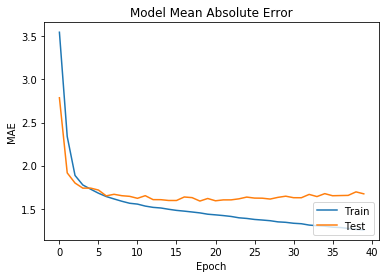

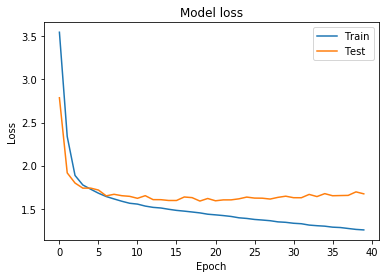

In [0]:
plt.plot(model_1_results.history['mean_absolute_error'])
plt.plot(model_1_results.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(model_1_results.history['loss'])
plt.plot(model_1_results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
#predicting
y_output = model_1.predict(reshaped_normalized_x_test)

In [0]:
predictions = pd.read_csv('sample_submission_2019fall.csv', header=0, index_col=0)

In [0]:
predictions['temperature']=y_output
predictions.to_csv('mode1_submission6.csv')

In [0]:
# 
#model 2
#not so good results for this one 

model_2 = Sequential()
model_2.add(CuDNNLSTM(30, input_shape=(48, 4)))
model_2.add(Dense(1))
model_2.add(Activation('linear'))

model_2.summary()

#Compiling the model 

model_2.compile(loss='mae',
              optimizer=keras.optimizers.Adam(lr=0.02, decay=1e-6),
              metrics=['mae'])

#Fitting the model

model_2_results = model_2.fit(reshaped_normalized_x_train, reshaped_y_train,
          batch_size=45,
          epochs=40,
          validation_data=(reshaped_normalized_x_validation, reshaped_y_validation))

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_23 (CuDNNLSTM)    (None, 30)                4320      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 31        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 4,351
Trainable params: 4,351
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/40
38400/38400 [==============================] - 7s 180us/step - loss: 2.7559 - mean_absolute_error: 2.7559 - val_loss: 2.0413 - val_mean_absolute_error: 2.0413
Epoch 2/40
38400/38400 [==============================] - 5s 128us/step - loss: 2.0314 - mean_absolute_error: 2.0314 - val_loss: 1.9933 - val_mean_absolute_error:

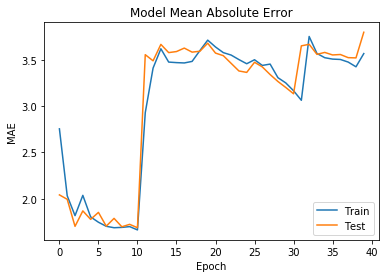

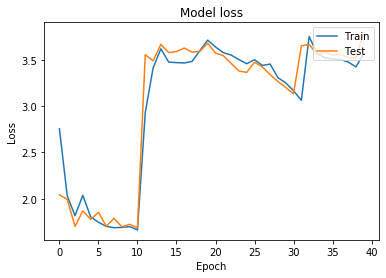

In [0]:
plt.plot(model_2_results.history['mean_absolute_error'])
plt.plot(model_2_results.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(model_2_results.history['loss'])
plt.plot(model_2_results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
#predicting
y_output = model_2.predict(reshaped_normalized_x_test)

In [0]:
predictions = pd.read_csv('sample_submission_2019fall.csv', header=0, index_col=0)

In [0]:
predictions['temperature']=y_output
predictions.to_csv('mode1_submission7.csv')

In [0]:
#Model - 3 
#running with updated changes in code

model_3 = Sequential()
model_3.add(CuDNNLSTM(50, input_shape=(48, 4)))
model_3.add(Dense(1, activation= 'linear'))
#model.add(Activation('relu'))

model_3.summary()

#Compiling the model 

model_3.compile(loss='mae',
              optimizer=keras.optimizers.Adam(lr=0.054),
              metrics=['mae'])

#Fitting the model

model_3_results = model_3.fit(reshaped_normalized_x_train, y_train,
          batch_size=45,
          epochs=40,
          validation_data=(reshaped_normalized_x_validation, y_validation))

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_24 (CuDNNLSTM)    (None, 50)                11200     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 51        
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/40
38400/38400 [==============================] - 7s 179us/step - loss: 2.9297 - mean_absolute_error: 2.9297 - val_loss: 3.0886 - val_mean_absolute_error: 3.0886
Epoch 2/40
38400/38400 [==============================] - 5s 129us/step - loss: 2.9778 - mean_absolute_error: 2.9778 - val_loss: 3.1613 - val_mean_absolute_error: 3.1613
Epoch 3/40
38400/38400 [==============================] - 5s 127us/step - loss: 3.0234 - mean_absolute_error: 3.0234 - val

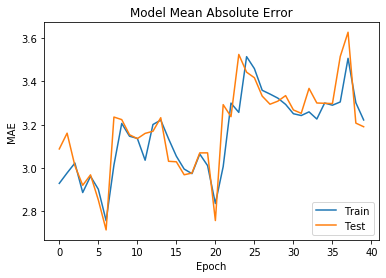

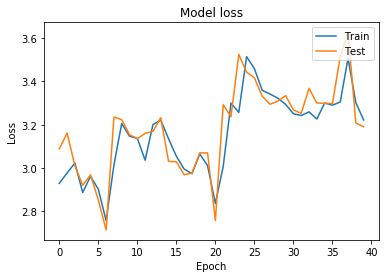

In [0]:
plt.plot(model_3_results.history['mean_absolute_error'])
plt.plot(model_3_results.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(model_3_results.history['loss'])
plt.plot(model_3_results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
#predicting
y_output = model_3.predict(reshaped_normalized_x_test)

In [0]:
predictions = pd.read_csv('sample_submission_2019fall.csv', header=0, index_col=0)

In [0]:
predictions['temperature']=y_output
predictions.to_csv('mode1_submission8.csv')

In [0]:
#model with relu
#model 4
#shouldnt submit a model with Relu
#with updated code 

model_4 = Sequential()
model_4.add(CuDNNLSTM(50, input_shape=(48, 4)))
model_4.add(Dense(1))
model_4.add(Activation('relu'))

model_4.summary()

#Compiling the model 

model_4.compile(loss='mae',
              optimizer=keras.optimizers.Adam(lr=0.001, decay=1e-6),
              metrics=['mae'])

#Fitting the model

model_4_results = model_4.fit(reshaped_normalized_x_train, y_train,
          batch_size=45,
          epochs=40,
          validation_data=(reshaped_normalized_x_validation, y_validation))

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_25 (CuDNNLSTM)    (None, 50)                11200     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 51        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/40
38400/38400 [==============================] - 7s 191us/step - loss: 3.7681 - mean_absolute_error: 3.7681 - val_loss: 2.8618 - val_mean_absolute_error: 2.8618
Epoch 2/40
38400/38400 [==============================] - 5s 131us/step - loss: 2.7699 - mean_absolute_error: 2.7699 - val_loss: 2.1623 - val_mean_absolute_erro

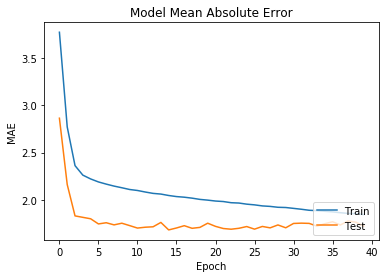

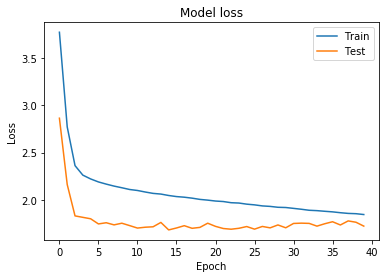

In [0]:
plt.plot(model_4_results.history['mean_absolute_error'])
plt.plot(model_4_results.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(model_4_results.history['loss'])
plt.plot(model_4_results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
#predicting
y_output = model_3.predict(reshaped_normalized_x_test)

In [0]:
predictions = pd.read_csv('sample_submission_2019fall.csv', header=0, index_col=0)

In [0]:
#model 4  5 -6 -7  (made minor changes, results arent changing )
#updated code

from keras import optimizers

rms = optimizers.RMSprop(lr=0.036, rho=0.9, epsilon=None, decay=1e-6)

model_7 = Sequential()
model_7.add(CuDNNLSTM(50, input_shape=(48, 4)))
model_7.add(Dropout(0.25))
model_7.add(Dense(1))

model_7.summary()

model_7.compile(loss='mae', optimizer= rms, metrics=['mae'])

model_7.summary()

model_7_results = model_7.fit(reshaped_normalized_x_train, reshaped_y_train, epochs=30, batch_size=75, 
                    validation_data=(reshaped_normalized_x_validation, reshaped_y_validation), shuffle= False)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_26 (CuDNNLSTM)    (None, 50)                11200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 51        
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_26 (CuDNNLSTM)    (None, 50)                11200     
__________________________________________

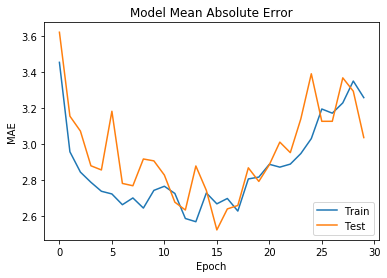

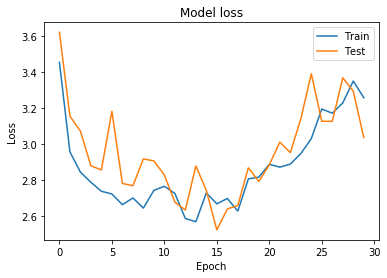

In [0]:
plt.plot(model_7_results.history['mean_absolute_error'])
plt.plot(model_7_results.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(model_7_results.history['loss'])
plt.plot(model_7_results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
#predicting
y_output = model_7.predict(reshaped_normalized_x_test)

In [0]:
predictions = pd.read_csv('sample_submission_2019fall.csv', header=0, index_col=0)

In [0]:
predictions['temperature']=y_output
predictions.to_csv('mode1_submitthis.csv')

In [0]:
#updated data

adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=1e-6)

model_8 = Sequential()

model_8.add(LSTM(40, input_shape=(48, 4)))

model_8.add(Dense(1))

model_8.compile(loss='mae', optimizer= rms)

model_8.summary()


model_8_results = model_8.fit(reshaped_normalized_x_train, y_train,
          batch_size=75,
          epochs=30,
          validation_data=(reshaped_normalized_x_validation, y_validation),verbose=2, shuffle=False)



Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 40)                7200      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 41        
Total params: 7,241
Trainable params: 7,241
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/30
 - 38s - loss: 4.9199 - val_loss: 3.7736
Epoch 2/30
 - 35s - loss: 3.3418 - val_loss: 3.4863
Epoch 3/30
 - 35s - loss: 3.0845 - val_loss: 3.3332
Epoch 4/30
 - 35s - loss: 2.8505 - val_loss: 2.9858
Epoch 5/30
 - 35s - loss: 2.5909 - val_loss: 2.7075
Epoch 6/30
 - 36s - loss: 2.3356 - val_loss: 2.4622
Epoch 7/30
 - 35s - loss: 2.1247 - val_loss: 2.2163
Epoch 8/30
 - 35s - loss: 1.9985 - val_loss: 2.1516
Epoch 9/30
 - 35s - loss: 1.9285 - val_loss: 2.0

In [0]:






## Plotting the loss on the Training vs. the Test set

plt.plot(model_9_results.history['loss'], label='Train')
plt.plot(model_9_results.history['val_loss'], label='Test')
plt.legend()
plt.show()

NameError: ignored

In [0]:
#predicting
y_output = model_9.predict(reshaped_normalized_x_test)

In [0]:
predictions = pd.read_csv('sample_submission_2019fall.csv', header=0, index_col=0)

In [0]:
predictions['temperature']=y_output
predictions.to_csv('mode_submitthis_model9.csv')

In [0]:
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=1e-6)

model_9 = Sequential()

model_9.add(LSTM(32, input_shape=(48, 4)))

model_9.add(Dense(1))

model_9.compile(loss='mae', optimizer= rms)

model_9.summary()


model_9_results = model_9.fit(reshaped_normalized_x_train, y_train,
          batch_size=65,
          epochs=30,
          validation_data=(reshaped_normalized_x_validation, y_validation),verbose=2, shuffle=False)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 32)                4736      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/30
 - 61s - loss: 5.1650 - val_loss: 4.0032
Epoch 2/30
 - 59s - loss: 3.4331 - val_loss: 3.6578
Epoch 3/30
 - 59s - loss: 3.1275 - val_loss: 3.3229
Epoch 4/30
 - 59s - loss: 2.8904 - val_loss: 3.1464
Epoch 5/30
 - 58s - loss: 2.7733 - val_loss: 3.1355
Epoch 6/30
 - 58s - loss: 2.6740 - val_loss: 3.1072
Epoch 7/30
 - 58s - loss: 2.5894 - val_loss: 3.0993
Epoch 8/30
 - 58s - loss: 2.5024 - val_loss: 3.0620
Epoch 9/30
 - 58s - loss: 2.4149 - val_loss: 2.9

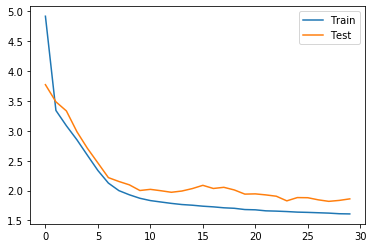

In [0]:


## Plotting the loss on the Training vs. the Test set

plt.plot(model_8_results.history['loss'], label='Train')
plt.plot(model_8_results.history['val_loss'], label='Test')
plt.legend()
plt.show()

In [0]:


#######################
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=1e-6)

model_11 = Sequential()

model_11.add(LSTM(25, input_shape=(48, 4)))

model_11.add(Dense(1))

model_11.compile(loss='mae', optimizer= rms)

model_11.summary()


model_11_results = model_11.fit(reshaped_normalized_x_train, y_train,
          batch_size=60,
          epochs=30,
          validation_data=(reshaped_normalized_x_validation, y_validation),verbose=2, shuffle=False)

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 25)                3000      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 26        
Total params: 3,026
Trainable params: 3,026
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/30
 - 46s - loss: 5.5897 - val_loss: 4.2786
Epoch 2/30
 - 44s - loss: 3.6090 - val_loss: 3.4956
Epoch 3/30
 - 44s - loss: 3.2500 - val_loss: 3.1211
Epoch 4/30
 - 44s - loss: 3.0375 - val_loss: 3.0755
Epoch 5/30
 - 44s - loss: 2.9102 - val_loss: 2.9283
Epoch 6/30
 - 44s - loss: 2.7710 - val_loss: 2.8489
Epoch 7/30
 - 44s - loss: 2.6464 - val_loss: 2.7925
Epoch 8/30
 - 44s - loss: 2.5218 - val_loss: 2.5671
Epoch 9/30
 - 44s - loss: 2.3517 - val_loss: 2.4

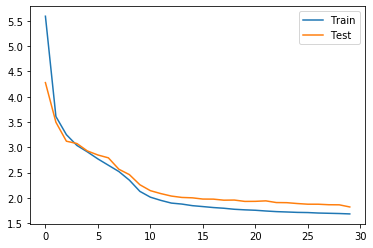

In [0]:
# Plotting the loss on the Training vs. the Test set

plt.plot(model_11_results.history['loss'], label='Train')
plt.plot(model_11_results.history['val_loss'], label='Test')
plt.legend()
plt.show()

In [0]:
#model 12
#updated code

#compare this with your best model. talk how it didnt do good. 

from keras import regularizers

model_12 = Sequential()
model_12.add(CuDNNLSTM(65, input_shape=(48,4), kernel_regularizer= regularizers.l2(1e-4)))
model_12.add(Dense(1, activation='linear'))
model_12.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

model_12_results = model_12.fit(reshaped_normalized_x_train, y_train,
          batch_size=40,
          epochs=30,
          validation_data=(reshaped_normalized_x_validation, y_validation),verbose=2, shuffle=False)

Train on 38400 samples, validate on 9600 samples
Epoch 1/30
 - 8s - loss: 5.4212 - mean_absolute_error: 5.4201 - val_loss: 5.6353 - val_mean_absolute_error: 5.6340
Epoch 2/30
 - 5s - loss: 4.5778 - mean_absolute_error: 4.5760 - val_loss: 4.3398 - val_mean_absolute_error: 4.3376
Epoch 3/30
 - 5s - loss: 3.6591 - mean_absolute_error: 3.6565 - val_loss: 3.5460 - val_mean_absolute_error: 3.5429
Epoch 4/30
 - 5s - loss: 3.1505 - mean_absolute_error: 3.1471 - val_loss: 3.2100 - val_mean_absolute_error: 3.2063
Epoch 5/30
 - 5s - loss: 3.0283 - mean_absolute_error: 3.0243 - val_loss: 3.2860 - val_mean_absolute_error: 3.2818
Epoch 6/30
 - 5s - loss: 2.7849 - mean_absolute_error: 2.7804 - val_loss: 2.6492 - val_mean_absolute_error: 2.6445
Epoch 7/30
 - 5s - loss: 2.1702 - mean_absolute_error: 2.1655 - val_loss: 2.3175 - val_mean_absolute_error: 2.3126
Epoch 8/30
 - 5s - loss: 1.9984 - mean_absolute_error: 1.9935 - val_loss: 2.1771 - val_mean_absolute_error: 2.1721
Epoch 9/30
 - 6s - loss: 1.8761

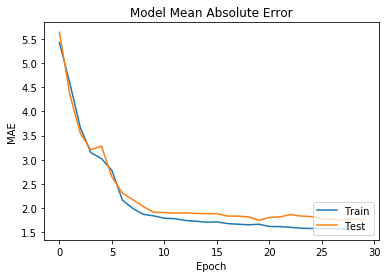

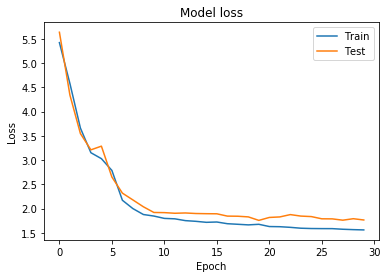

In [0]:
plt.plot(model_12_results.history['mean_absolute_error'])
plt.plot(model_12_results.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(model_12_results.history['loss'])
plt.plot(model_12_results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
#predicting
y_output = model_12.predict(reshaped_normalized_x_test)

In [0]:
predictions = pd.read_csv('sample_submission_2019fall.csv', header=0, index_col=0)

In [0]:
predictions['temperature']=y_output
predictions.to_csv('mode1_submitthisnow1.csv')

In [0]:
model_13 = Sequential()
model_13.add(CuDNNLSTM(65, input_shape=(48,4), kernel_regularizer= regularizers.l2(1e-4)))
model_13.add(Dense(1, activation='linear'))
model_13.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])



model_13_results = model_13.fit(reshaped_normalized_x_train, y_train,
          batch_size=40,
          epochs=30,
          validation_data=(reshaped_normalized_x_validation, y_validation), shuffle=False)

model_13.summary()


Train on 38400 samples, validate on 9600 samples
Epoch 1/30
38400/38400 [==============================] - 8s 215us/step - loss: 4.8658 - mean_absolute_error: 4.8650 - val_loss: 4.8850 - val_mean_absolute_error: 4.8839
Epoch 2/30
38400/38400 [==============================] - 6s 148us/step - loss: 3.5361 - mean_absolute_error: 3.5346 - val_loss: 4.3756 - val_mean_absolute_error: 4.3739
Epoch 3/30
38400/38400 [==============================] - 6s 145us/step - loss: 2.9093 - mean_absolute_error: 2.9072 - val_loss: 3.5165 - val_mean_absolute_error: 3.5141
Epoch 4/30
38400/38400 [==============================] - 6s 144us/step - loss: 2.3158 - mean_absolute_error: 2.3132 - val_loss: 2.3816 - val_mean_absolute_error: 2.3788
Epoch 5/30
38400/38400 [==============================] - 6s 145us/step - loss: 2.0424 - mean_absolute_error: 2.0395 - val_loss: 2.1459 - val_mean_absolute_error: 2.1429
Epoch 6/30
38400/38400 [==============================] - 6s 146us/step - loss: 1.9411 - mean_absolut

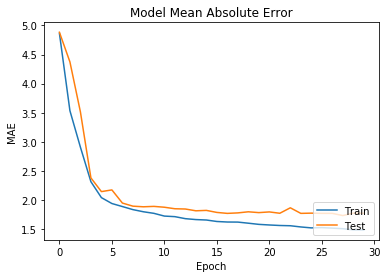

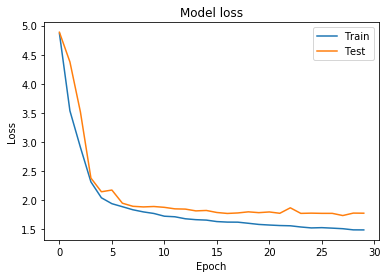

In [0]:
plt.plot(model_13_results.history['mean_absolute_error'])
plt.plot(model_13_results.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(model_13_results.history['loss'])
plt.plot(model_13_results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
#predicting
y_output = model_12.predict(reshaped_normalized_x_test)

In [0]:
predictions = pd.read_csv('sample_submission_2019fall.csv', header=0, index_col=0)

In [0]:
predictions['temperature']=y_output
predictions.to_csv('mode1_submitthisnow2.csv')

In [0]:
#not a good model
#updated data
from keras import regularizers

model_14 = Sequential()
model_14.add(CuDNNLSTM(32, input_shape=(48,4), kernel_regularizer= regularizers.l2(1e-4)))
model_14.add(Dense(1, activation='linear'))
model_14.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

model_14.summary()

model_14_results = model_12.fit(reshaped_normalized_x_train, y_train,
          batch_size=40,
          epochs=30,
          validation_data=(reshaped_normalized_x_validation, y_validation),verbose=2, shuffle=False)

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_30 (CuDNNLSTM)    (None, 32)                4864      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 33        
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/30
 - 7s - loss: 1.5422 - mean_absolute_error: 1.5331 - val_loss: 1.7784 - val_mean_absolute_error: 1.7692
Epoch 2/30
 - 5s - loss: 1.5414 - mean_absolute_error: 1.5322 - val_loss: 1.7745 - val_mean_absolute_error: 1.7652
Epoch 3/30
 - 5s - loss: 1.5426 - mean_absolute_error: 1.5332 - val_loss: 1.7742 - val_mean_absolute_error: 1.7647
Epoch 4/30
 - 5s - loss: 1.5214 - mean_absolute_error: 1.5119 - val_loss: 1.7514 - val_mean_absolute_error: 1.7419
Epoc

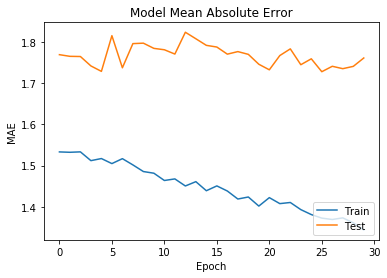

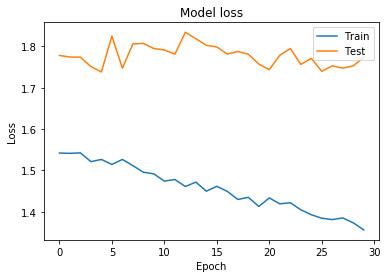

In [0]:
plt.plot(model_14_results.history['mean_absolute_error'])
plt.plot(model_14_results.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(model_14_results.history['loss'])
plt.plot(model_14_results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
from keras import regularizers

model_15 = Sequential()
model_15.add(CuDNNLSTM(32, input_shape=(48,4), kernel_regularizer= regularizers.l2(1e-4)))
model_15.add(Dense(1, activation='linear'))
model_15.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

model_15_results = model_15.fit(reshaped_normalized_x_train, y_train,
          batch_size=75,
          epochs=30,
          validation_data=(reshaped_normalized_x_validation, y_validation),verbose=2, shuffle=False)

Train on 38400 samples, validate on 9600 samples
Epoch 1/30
 - 4s - loss: 5.4588 - mean_absolute_error: 5.4579 - val_loss: 4.6819 - val_mean_absolute_error: 4.6808
Epoch 2/30
 - 3s - loss: 3.6625 - mean_absolute_error: 3.6613 - val_loss: 4.2226 - val_mean_absolute_error: 4.2213
Epoch 3/30
 - 3s - loss: 3.1763 - mean_absolute_error: 3.1748 - val_loss: 4.0788 - val_mean_absolute_error: 4.0772
Epoch 4/30
 - 2s - loss: 2.9998 - mean_absolute_error: 2.9982 - val_loss: 3.9493 - val_mean_absolute_error: 3.9476
Epoch 5/30
 - 3s - loss: 2.8278 - mean_absolute_error: 2.8260 - val_loss: 3.7561 - val_mean_absolute_error: 3.7541
Epoch 6/30
 - 2s - loss: 2.6885 - mean_absolute_error: 2.6865 - val_loss: 3.7056 - val_mean_absolute_error: 3.7035
Epoch 7/30
 - 3s - loss: 2.5240 - mean_absolute_error: 2.5218 - val_loss: 3.6040 - val_mean_absolute_error: 3.6017
Epoch 8/30
 - 3s - loss: 2.4047 - mean_absolute_error: 2.4023 - val_loss: 3.5913 - val_mean_absolute_error: 3.5889
Epoch 9/30
 - 3s - loss: 2.2975

In [0]:
#ran with new data
#best model for me 
#the model that i ran after fixing 
#already uploaded these scores
from keras import regularizers


model_15 = Sequential()
model_15.add(CuDNNLSTM(30, input_shape=(48,4), kernel_regularizer= regularizers.l2(1e-4)))
model_15.add(Dense(1, activation='linear'))
model_15.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

model_15.summary()

model_15_results = model_15.fit(reshaped_normalized_x_train, y_train,
          batch_size=40,
          epochs=30,
          validation_data=(reshaped_normalized_x_validation, y_validation),verbose=2, shuffle=False)

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_32 (CuDNNLSTM)    (None, 30)                4320      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 31        
Total params: 4,351
Trainable params: 4,351
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/30
 - 8s - loss: 5.1646 - mean_absolute_error: 5.1637 - val_loss: 4.4780 - val_mean_absolute_error: 4.4769
Epoch 2/30
 - 5s - loss: 3.5770 - mean_absolute_error: 3.5756 - val_loss: 3.4431 - val_mean_absolute_error: 3.4414
Epoch 3/30
 - 5s - loss: 2.9788 - mean_absolute_error: 2.9769 - val_loss: 2.9984 - val_mean_absolute_error: 2.9963
Epoch 4/30
 - 5s - loss: 2.4148 - mean_absolute_error: 2.4126 - val_loss: 2.2346 - val_mean_absolute_error: 2.2323
Epoc

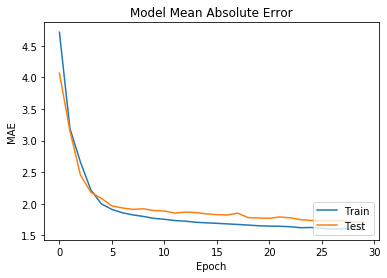

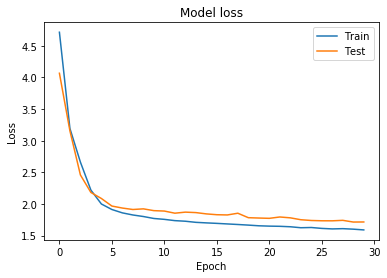

In [0]:
plt.plot(model_15_results.history['mean_absolute_error'])
plt.plot(model_15_results.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(model_15_results.history['loss'])
plt.plot(model_15_results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
#predicting
y_output = model_15.predict(reshaped_normalized_x_test)

In [0]:
predictions = pd.read_csv('sample_submission_2019fall.csv', header=0, index_col=0)

In [0]:
predictions['temperature']=y_output
predictions.to_csv('mode1_submission15.csv')

In [0]:
from keras import optimizers
#model - takes a longer time new data
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=1e-6)

model_16 = Sequential()

model_16.add(LSTM(50, input_shape=(48, 4)))

model_16.add(Dense(1))

model_16.compile(loss='mae', optimizer= rms)

model_16.summary()

model_16_results = model_16.fit(reshaped_normalized_x_train, y_train,
          batch_size=30, epochs=30,
                    validation_data=(reshaped_normalized_x_validation, y_validation), verbose=2, shuffle=False)



Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                11000     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 51        
Total params: 11,051
Trainable params: 11,051
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 38400 samples, validate on 9600 samples
Epoch 1/30
 - 87s - loss: 3.7943 - val_loss: 4.3618
Epoch 2/30
 - 84s - loss: 2.8804 - val_loss: 3.1869
Epoch 3/30
 - 84s - loss: 2.3080 - val_loss: 2.5618
Epoch 4/30
 - 84s - loss: 2.0349 - val_loss: 2.5605
Epoch 5/30
 - 84s - loss: 1.9312 - val_loss: 2.5084
Epoch 6/30
 - 84s - loss: 1.8751 - val_loss: 2.3327
Epoch 7/30
 - 84s - loss: 1.8313 - val_loss: 2.2150
Epoc

In [0]:
#ran with new data
#best model for me 
#the model that i ran after fixing 
#already uploaded these scores
from keras import regularizers


model_19 = Sequential()
model_19.add(CuDNNLSTM(32, input_shape=(48,4), kernel_regularizer= regularizers.l2(1e-4)))
model_19.add(Dense(1, activation='linear'))
model_19.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

model_19.summary()

model_19_results = model_19.fit(reshaped_normalized_x_train, y_train,
          batch_size=50,
          epochs=30,
          validation_data=(reshaped_normalized_x_validation, y_validation),verbose=2, shuffle=False)

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_33 (CuDNNLSTM)    (None, 32)                4864      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 33        
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/30
 - 7s - loss: 5.0245 - mean_absolute_error: 5.0237 - val_loss: 3.8186 - val_mean_absolute_error: 3.8176
Epoch 2/30
 - 4s - loss: 3.4583 - mean_absolute_error: 3.4573 - val_loss: 3.3899 - val_mean_absolute_error: 3.3889
Epoch 3/30
 - 4s - loss: 2.9234 - mean_absolute_error: 2.9222 - val_loss: 2.7873 - val_mean_absolute_error: 2.7860
Epoch 4/30
 - 4s - loss: 2.3684 - mean_absolute_error: 2.3670 - val_loss: 2.2861 - val_mean_absolute_error: 2.2846
Epoc

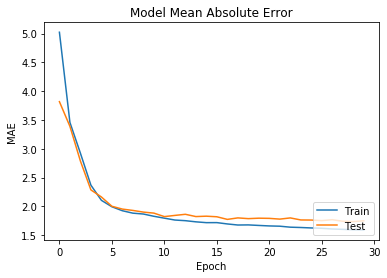

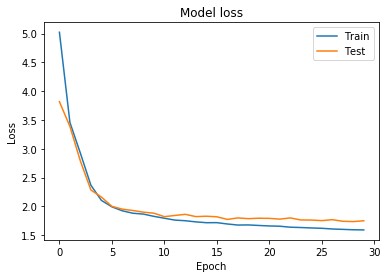

In [0]:
plt.plot(model_19_results.history['mean_absolute_error'])
plt.plot(model_19_results.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(model_19_results.history['loss'])
plt.plot(model_19_results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
#trying new model
from keras import regularizers


model_20 = Sequential()
model_20.add(CuDNNLSTM(32, input_shape=(48,4), kernel_regularizer= regularizers.l2(1e-4)))
model_20.add(Dense(1, activation='linear'))
model_20.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

model_20.summary()

model_20_results = model_20.fit(reshaped_normalized_x_train, y_train,
          batch_size=30,
          epochs=30,
          validation_data=(reshaped_normalized_x_validation, y_validation),verbose=2, shuffle=False)

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_35 (CuDNNLSTM)    (None, 32)                4864      
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 33        
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/30
 - 10s - loss: 4.6004 - mean_absolute_error: 4.5994 - val_loss: 4.2962 - val_mean_absolute_error: 4.2950
Epoch 2/30
 - 7s - loss: 3.2193 - mean_absolute_error: 3.2179 - val_loss: 3.3358 - val_mean_absolute_error: 3.3342
Epoch 3/30
 - 7s - loss: 2.5283 - mean_absolute_error: 2.5264 - val_loss: 2.2566 - val_mean_absolute_error: 2.2546
Epoch 4/30
 - 7s - loss: 2.0815 - mean_absolute_error: 2.0794 - val_loss: 2.1115 - val_mean_absolute_error: 2.1092
Epo

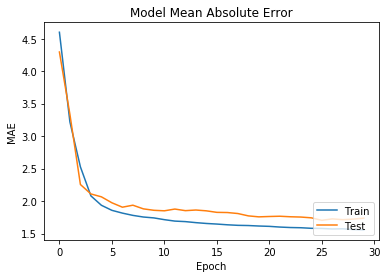

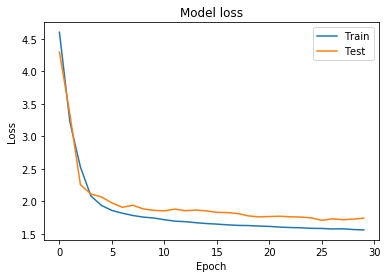

In [0]:
plt.plot(model_20_results.history['mean_absolute_error'])
plt.plot(model_20_results.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(model_20_results.history['loss'])
plt.plot(model_20_results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
#trying new model 
#a little more changes 

from keras import regularizers


model_21 = Sequential()
model_21.add(CuDNNLSTM(32, input_shape=(48,4), kernel_regularizer= regularizers.l2(1e-4)))
model_21.add(Dense(1, activation='linear'))
model_21.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

model_21.summary()

model_21_results = model_21.fit(reshaped_normalized_x_train, y_train,
          batch_size=75,
          epochs=30,
          validation_data=(reshaped_normalized_x_validation, y_validation),verbose=2, shuffle=False)

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_36 (CuDNNLSTM)    (None, 32)                4864      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 33        
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/30
 - 7s - loss: 5.6637 - mean_absolute_error: 5.6628 - val_loss: 4.1643 - val_mean_absolute_error: 4.1633
Epoch 2/30
 - 3s - loss: 3.8733 - mean_absolute_error: 3.8723 - val_loss: 3.5402 - val_mean_absolute_error: 3.5392
Epoch 3/30
 - 3s - loss: 3.4242 - mean_absolute_error: 3.4230 - val_loss: 3.2340 - val_mean_absolute_error: 3.2327
Epoch 4/30
 - 3s - loss: 3.1581 - mean_absolute_error: 3.1567 - val_loss: 3.0001 - val_mean_absolute_error: 2.9986
Epoc

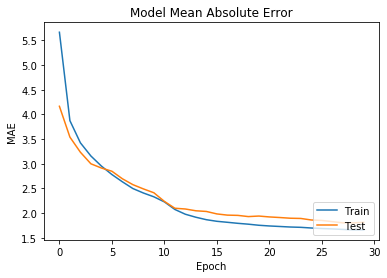

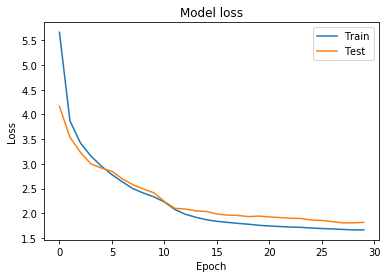

In [0]:
plt.plot(model_21_results.history['mean_absolute_error'])
plt.plot(model_21_results.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(model_21_results.history['loss'])
plt.plot(model_21_results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
#trying new model 
#a little more changes 

from keras import regularizers


model_22 = Sequential()
model_22.add(CuDNNLSTM(32, input_shape=(48,4), kernel_regularizer= regularizers.l2(1e-4)))
model_22.add(Dense(1, activation='linear'))
model_22.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

model_22.summary()

model_22_results = model_22.fit(reshaped_normalized_x_train, y_train,
          batch_size=30,
          epochs=30,
          validation_data=(reshaped_normalized_x_validation, y_validation),verbose=2, shuffle=False)

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_37 (CuDNNLSTM)    (None, 32)                4864      
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 33        
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/30
 - 10s - loss: 4.7145 - mean_absolute_error: 4.7136 - val_loss: 3.4964 - val_mean_absolute_error: 3.4953
Epoch 2/30
 - 7s - loss: 3.2465 - mean_absolute_error: 3.2453 - val_loss: 3.5588 - val_mean_absolute_error: 3.5574
Epoch 3/30
 - 7s - loss: 3.0100 - mean_absolute_error: 3.0084 - val_loss: 3.3938 - val_mean_absolute_error: 3.3920
Epoch 4/30
 - 7s - loss: 2.8388 - mean_absolute_error: 2.8366 - val_loss: 2.9844 - val_mean_absolute_error: 2.9821
Epo

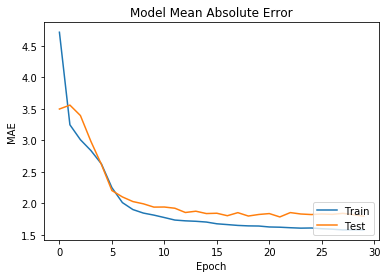

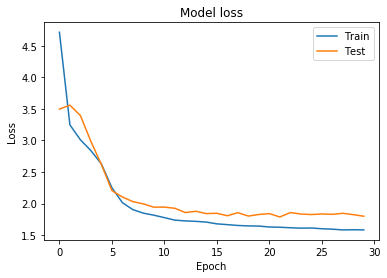

In [0]:
plt.plot(model_22_results.history['mean_absolute_error'])
plt.plot(model_22_results.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(model_22_results.history['loss'])
plt.plot(model_22_results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
#trying new model 
#a little more changes 

from keras import regularizers


model_23 = Sequential()
model_23.add(CuDNNLSTM(60, input_shape=(48,4), kernel_regularizer= regularizers.l2(1e-4)))
model_23.add(Dense(1, activation='linear'))
model_23.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

model_23.summary()

model_23_results = model_23.fit(reshaped_normalized_x_train, y_train,
          batch_size=20,
          epochs=30,
          validation_data=(reshaped_normalized_x_validation, y_validation),verbose=2, shuffle=False)

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_38 (CuDNNLSTM)    (None, 60)                15840     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 61        
Total params: 15,901
Trainable params: 15,901
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/30
 - 13s - loss: 3.9192 - mean_absolute_error: 3.9177 - val_loss: 3.9176 - val_mean_absolute_error: 3.9150
Epoch 2/30
 - 10s - loss: 3.0318 - mean_absolute_error: 3.0283 - val_loss: 3.4849 - val_mean_absolute_error: 3.4806
Epoch 3/30
 - 10s - loss: 2.5517 - mean_absolute_error: 2.5465 - val_loss: 2.4367 - val_mean_absolute_error: 2.4309
Epoch 4/30
 - 10s - loss: 2.0847 - mean_absolute_error: 2.0786 - val_loss: 2.2009 - val_mean_absolute_error: 2.194

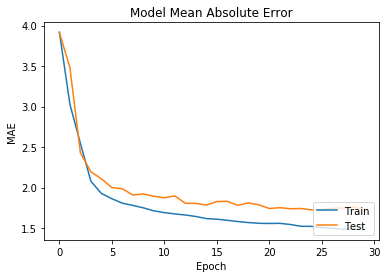

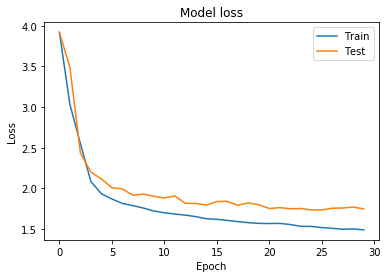

In [0]:
plt.plot(model_23_results.history['mean_absolute_error'])
plt.plot(model_23_results.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(model_23_results.history['loss'])
plt.plot(model_23_results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:

#best model
from keras import regularizers


model_24 = Sequential()
model_24.add(CuDNNLSTM(20, input_shape=(48,4), kernel_regularizer= regularizers.l2(1e-4)))
model_24.add(Dense(1, activation='linear'))
model_24.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

model_24.summary()

model_24_results = model_24.fit(reshaped_normalized_x_train, y_train,
          batch_size=45,
          epochs=30,
          validation_data=(reshaped_normalized_x_validation, y_validation),verbose=2, shuffle=False)

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_41 (CuDNNLSTM)    (None, 20)                2080      
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 21        
Total params: 2,101
Trainable params: 2,101
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/30
 - 8s - loss: 5.5852 - mean_absolute_error: 5.5844 - val_loss: 3.9561 - val_mean_absolute_error: 3.9552
Epoch 2/30
 - 5s - loss: 3.5183 - mean_absolute_error: 3.5173 - val_loss: 3.3809 - val_mean_absolute_error: 3.3798
Epoch 3/30
 - 5s - loss: 3.1340 - mean_absolute_error: 3.1328 - val_loss: 3.0738 - val_mean_absolute_error: 3.0725
Epoch 4/30
 - 4s - loss: 2.8724 - mean_absolute_error: 2.8710 - val_loss: 2.8220 - val_mean_absolute_error: 2.8205
Epoc

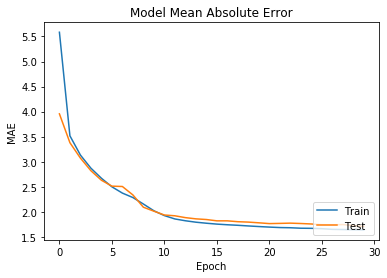

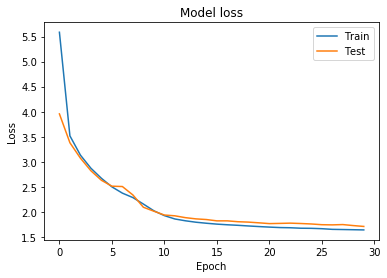

In [0]:
plt.plot(model_24_results.history['mean_absolute_error'])
plt.plot(model_24_results.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(model_24_results.history['loss'])
plt.plot(model_24_results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
#predicting
y_output = model_1.predict(reshaped_normalized_x_test)

In [0]:
predictions = pd.read_csv('sample_submission_2019fall.csv', header=0, index_col=0)

In [0]:
predictions['temperature']=y_output
predictions.to_csv('mode1_lastsubmission.csv')